# Melanoma Detection
The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

# Problem Statement:
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# Data Description:
The data set contains the following categories:

Actinic keratosis
Basal cell carcinoma
Dermatofibroma
Melanoma
Nevus
Pigmented benign keratosis
Seborrheic keratosis
Squamous cell carcinoma
Vascular lesion

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from sklearn.datasets import load_files
from keras.utils import np_utils

In [3]:
data_dir_train1 = pathlib.Path(r"C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test1 = pathlib.Path(r'C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [4]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print("Train data consists of {} images.".format(image_count_train1))

image_count_test1 = len(list(data_dir_test1.glob('*/*.jpg')))
print("Test data consists of {} images.".format(image_count_test1))

Train data consists of 2239 images.
Test data consists of 118 images.


In [5]:
batch_size = 32
img_height = 180
img_width = 180
epochs = 20
seed = 123

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
class_names = train_ds.class_names
print("As we can see that we have 9 category in our dataset. They are as follows:\n")
for i,j in enumerate(class_names):
    print(str(i+1) + ' - ' + j)

As we can see that we have 9 category in our dataset. They are as follows:

1 - actinic keratosis
2 - basal cell carcinoma
3 - dermatofibroma
4 - melanoma
5 - nevus
6 - pigmented benign keratosis
7 - seborrheic keratosis
8 - squamous cell carcinoma
9 - vascular lesion


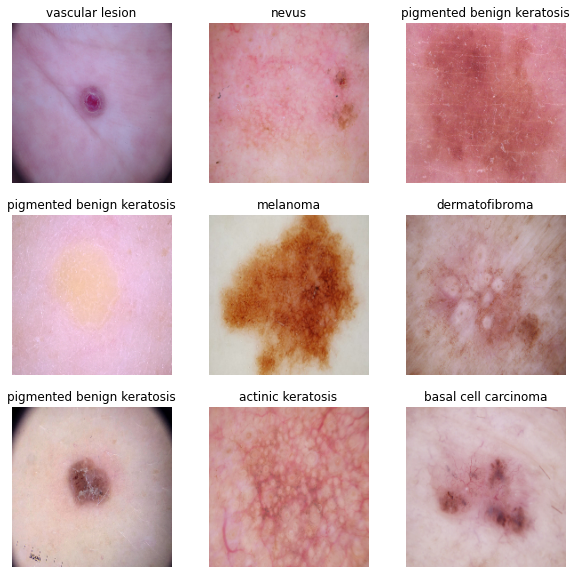

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        

In [12]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [17]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 24s 320ms/step - loss: 2.0271 - accuracy: 0.2277 - val_loss: 1.9458 - val_accuracy: 0.2036
Epoch 2/20
56/56 [==============================] - 17s 298ms/step - loss: 1.7457 - accuracy: 0.3739 - val_loss: 1.5122 - val_accuracy: 0.4698
Epoch 3/20
56/56 [==============================] - 17s 297ms/step - loss: 1.4727 - accuracy: 0.4955 - val_loss: 1.5122 - val_accuracy: 0.4765
Epoch 4/20
56/56 [==============================] - 17s 299ms/step - loss: 1.3870 - accuracy: 0.5223 - val_loss: 1.4612 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 17s 296ms/step - loss: 1.2421 - accuracy: 0.5698 - val_loss: 1.5520 - val_accuracy: 0.4743
Epoch 6/20
56/56 [==============================] - 17s 300ms/step - loss: 1.1571 - accuracy: 0.5993 - val_loss: 1.3996 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 17s 310ms/step - loss: 1.0608 - accuracy: 0.6300 - val_loss: 1.3759 - val_accuracy: 0.5526

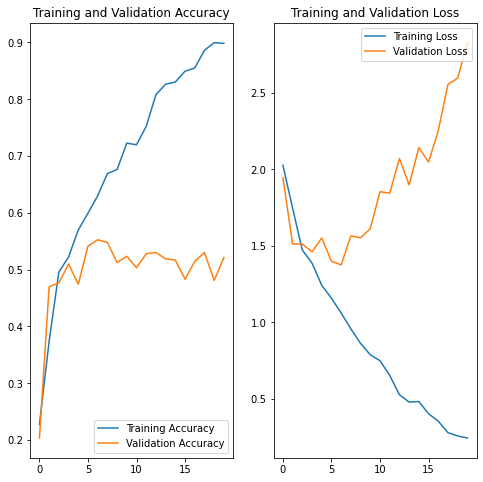

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 
As we can see the training accuracy increases with each epochs and validation accuracy but is not increasing with each epochs. 
So,it can be observed that training accuracy is high compared to validation accuracy which means that the model has learned the training data and not generalised it.So, It is a clear sign of overfitting. The Overfit model has very low accuracy on unseen data.

# 
So,, we have to overcome overfitting of data and re- build the model

Techniques to overcome overfitting are

Data Augumentation
Dropout Regularization
Hence, we will try to implement the same in the above model.

In [20]:
def load_data_raw (path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 9)
    
    return files, targets

train_filenames, train_targets = load_data_raw(data_dir_train1)

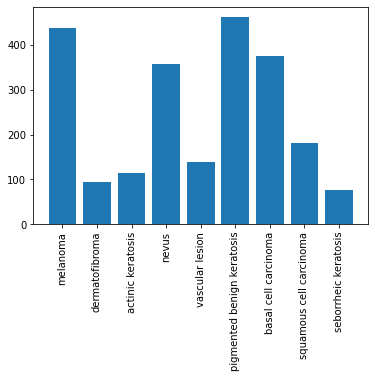

In [21]:
from collections import Counter
filenames_trimmed = [filename.split('\\')[-2] for filename in train_filenames]
classes_count = Counter(filenames_trimmed)

# Plot the classes
plt.bar(classes_count.keys(), classes_count.values())
plt.xticks(rotation = 90)
plt.show()

In [22]:
total = sum(classes_count.values())
for key,value in classes_count.items():
    classes_count[key] = (value/total)

                        Label  Percentage
0                    melanoma    0.195623
1              dermatofibroma    0.042430
2           actinic keratosis    0.050916
3                       nevus    0.159446
4             vascular lesion    0.062081
5  pigmented benign keratosis    0.206342
6        basal cell carcinoma    0.167932
7     squamous cell carcinoma    0.080840
8        seborrheic keratosis    0.034390


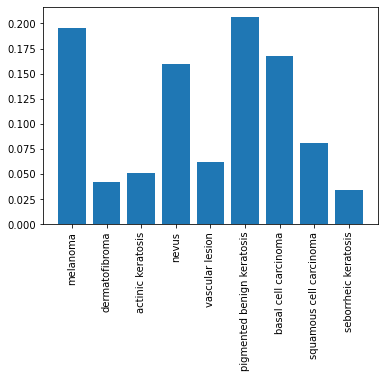

In [23]:
print(pd.DataFrame(classes_count.items(),columns=['Label', 'Percentage']))
plt.bar(classes_count.keys(), classes_count.values())
plt.xticks(rotation = 90)
plt.show()

In [24]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [26]:
import Augmentor
path_to_training_dataset= r"C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+str("/") + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C28BA606A0>: 100%|█| 500/500 [00:03<00:00, 143.02 Samples


Initialised with 376 image(s) found.
Output directory set to C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C28882D280>: 100%|█| 500/500 [00:03<00:00, 148.63 Samples


Initialised with 95 image(s) found.
Output directory set to C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C2888816A0>: 100%|█| 500/500 [00:03<00:00, 141.40 Samples


Initialised with 438 image(s) found.
Output directory set to C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1C280545B50>: 100%|█| 500/500 [00:19<00:00, 25.66 Samples


Initialised with 357 image(s) found.
Output directory set to C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1C2887EA2B0>: 100%|█| 500/500 [00:14<00:00, 34.54 Samples/


Initialised with 462 image(s) found.
Output directory set to C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C28054BDC0>: 100%|█| 500/500 [00:03<00:00, 152.25 Samples


Initialised with 77 image(s) found.
Output directory set to C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1C2802958B0>: 100%|█| 500/500 [00:08<00:00, 60.92 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C288807B80>: 100%|█| 500/500 [00:03<00:00, 152.30 Samples


Initialised with 139 image(s) found.
Output directory set to C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C280551B20>: 100%|█| 500/500 [00:03<00:00, 154.18 Samples


In [27]:
image_count_train1 = len(list(data_dir_train1.glob('*/output/*.jpg')))
print(image_count_train1)

4500


In [28]:
from glob import *
path_list_new = [x for x in glob(os.path.join(data_dir_train1, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\Sairam\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_00c7175f-da92-4676-8a2d-8bdf08cc06f1.jpg',
 'C:\\Users\\Sairam\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_19411b0d-e52e-4294-b794-6acfb35e94c7.jpg',
 'C:\\Users\\Sairam\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_233ec99e-6ab5-49c3-bb07-c4615f0ff50c.jpg',
 'C:\\Users\\Sairam\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_473fa1eb-061e-45ee-a5df-59ca4be38182.jpg',
 'C:\\Users\\Sairam\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic

In [29]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train1, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [30]:
data_dir_train1 = pathlib.Path(r"C:\Users\Sairam\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [31]:
val_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [32]:
class_names = train_ds1.class_names
print("As we can see that we have 9 category in our dataset. They are as follows:\n")
for i,j in enumerate(class_names):
    print(str(i+1) + ' - ' + j)

As we can see that we have 9 category in our dataset. They are as follows:

1 - actinic keratosis
2 - basal cell carcinoma
3 - dermatofibroma
4 - melanoma
5 - nevus
6 - pigmented benign keratosis
7 - seborrheic keratosis
8 - squamous cell carcinoma
9 - vascular lesion


# Now we can see 9 category in the dataset.
1 - actinic keratosis

2 - basal cell carcinoma

3 - dermatofibroma

4 - melanoma

5 - nevus

6 - pigmented benign keratosis

7 - seborrheic keratosis

8 - squamous cell carcinoma

9 - vascular lesion

In [33]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),## normalization
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [36]:
epochs=30
history = model.fit(
  train_ds1,
  validation_data=val_ds1,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 60s 349ms/step - loss: 1.7390 - accuracy: 0.3359 - val_loss: 1.4934 - val_accuracy: 0.4321
Epoch 2/30
169/169 [==============================] - 57s 334ms/step - loss: 1.4405 - accuracy: 0.4509 - val_loss: 1.4459 - val_accuracy: 0.4165
Epoch 3/30
169/169 [==============================] - 58s 339ms/step - loss: 1.3105 - accuracy: 0.4967 - val_loss: 1.3051 - val_accuracy: 0.5033
Epoch 4/30
169/169 [==============================] - 61s 359ms/step - loss: 1.2120 - accuracy: 0.5373 - val_loss: 1.1650 - val_accuracy: 0.5553
Epoch 5/30
169/169 [==============================] - 76s 447ms/step - loss: 1.0461 - accuracy: 0.6042 - val_loss: 1.0613 - val_accuracy: 0.6065
Epoch 6/30
169/169 [==============================] - 77s 452ms/step - loss: 0.9216 - accuracy: 0.6630 - val_loss: 0.9479 - val_accuracy: 0.6474
Epoch 7/30
169/169 [==============================] - 74s 433ms/step - loss: 0.7801 - accuracy: 0.7131 - val_loss: 0.8817 - val_ac

Text(0.5, 1.0, 'Training and Validation Loss')

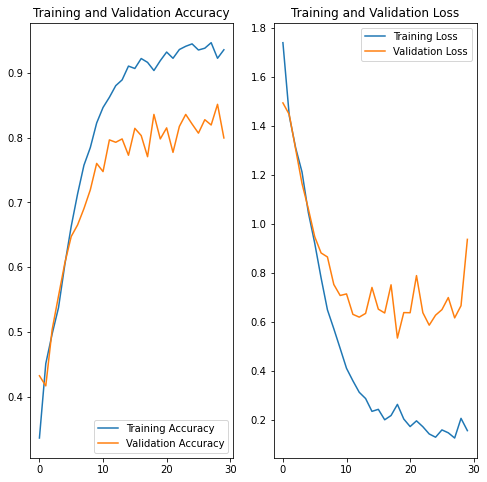

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# We can see that we have reduced the overfitting as well as increased the training accuracy and validation accuracy with the help of sampling method.

# Conclusion
First of all we build a simple CNN model, got an training accuracy of 89% and validation accuracy of around 52%.So, It is a clear sign of overfitting. We can see with the help of data augmented method and dropout regularization method, overfitting of the data can be reduced. In this case it has been reduced the overfitting, but decreased our training accuracy(approx. 63%) and validation accuracy(approx. 57%). To increase the accuracy of both training and validation with overfitting in check, we used augmented sampling technique with dropout regularization. So, the training accuracy has increased from around 63% to 93% approx. and validation accuracy from around 57% to 79% approx. with removal of overfitting.